In [8]:
import pandas as pd

In [9]:
import os
import tarfile
import urllib
DL_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DL_ROOT + "datasets/housing/housing.tgz"

In [10]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [13]:
housing_data = pd.read_csv(os.path.join(HOUSING_PATH, "housing.csv"))
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(close=None, block=None)>

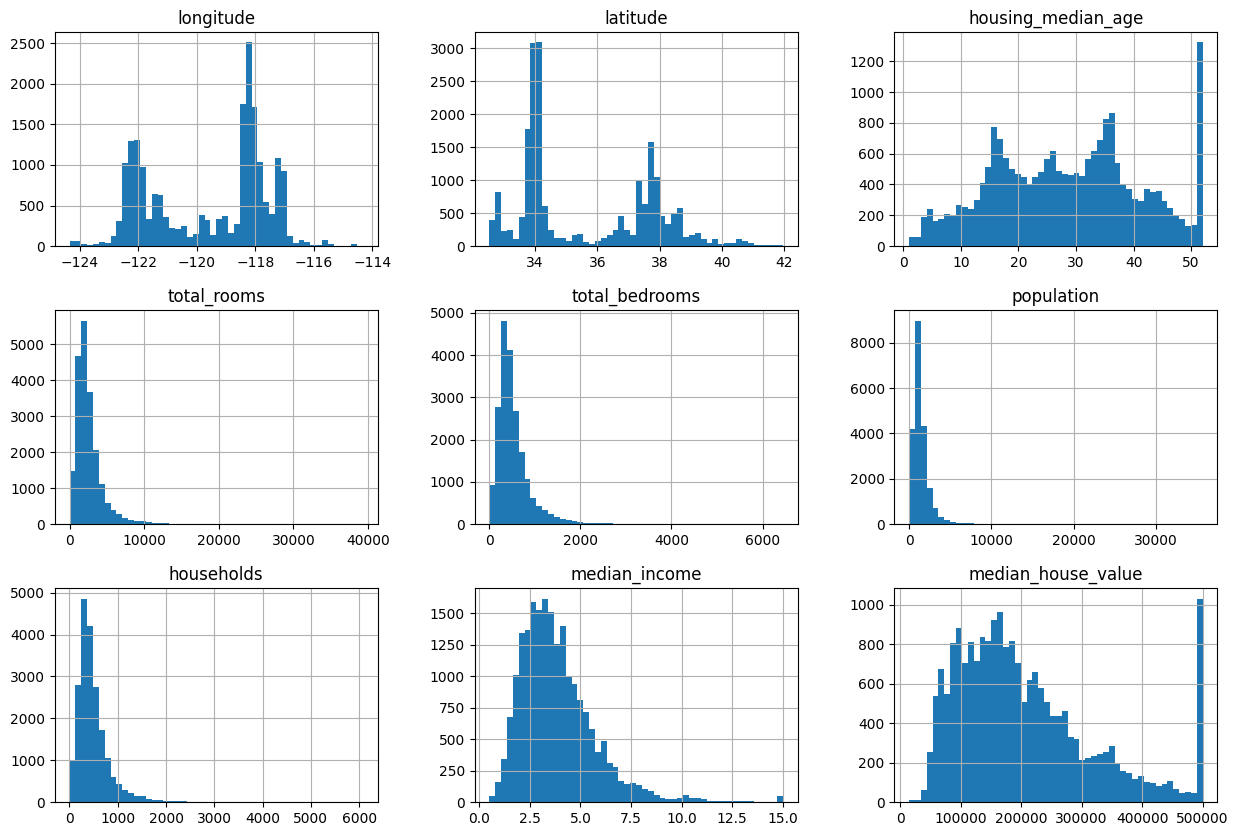

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(15,10))
plt.show

In [33]:
from sklearn.model_selection import train_test_split
import numpy as np

In [34]:
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=1989)

<AxesSubplot: >

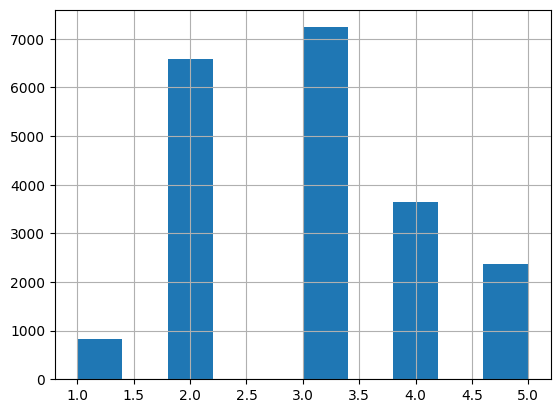

In [35]:
housing_data['income_cat'] = pd.cut(housing_data['median_income'],bins=[0,1.5,3.,4.5,6., np.inf],labels=[1,2,3,4,5])
housing_data['income_cat'].hist()

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1989)

In [37]:
for train_index, test_index in split.split(housing_data, housing_data['income_cat']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [38]:
strat_test_set['income_cat'].value_counts()/ len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

<AxesSubplot: >

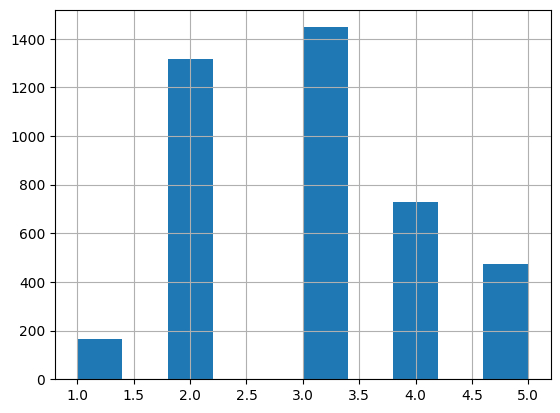

In [40]:
strat_test_set['income_cat'].hist()

In [41]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [42]:
housing = strat_train_set.copy()

C:\Users\Usuario1\anaconda3\envs\Machine Learning Topics Explanation\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

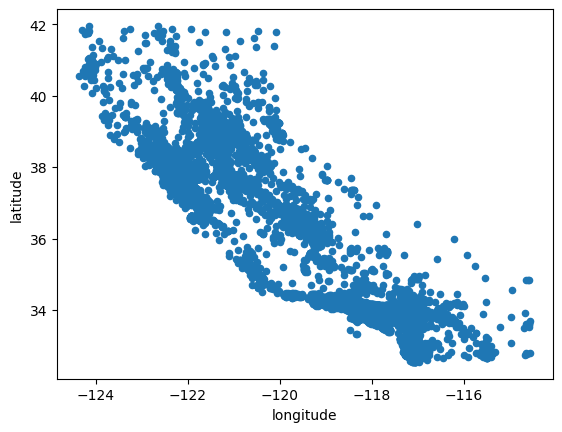

In [43]:
housing.plot(kind='scatter', x='longitude', y='latitude')

C:\Users\Usuario1\anaconda3\envs\Machine Learning Topics Explanation\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

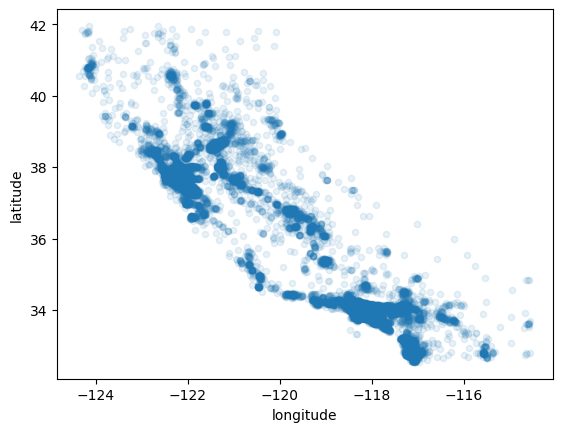

In [44]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

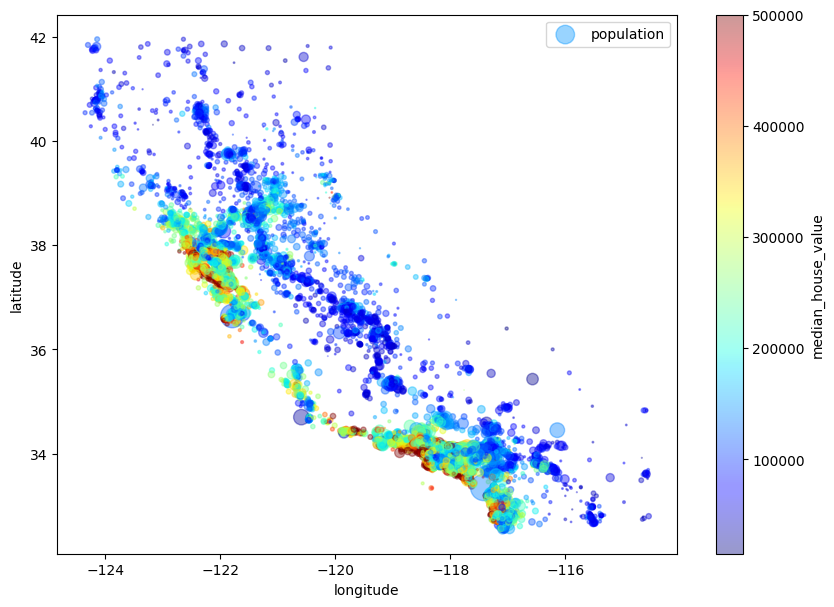

In [45]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population', figsize=(10,7), c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [46]:
corr_matrix = housing.corr()

In [47]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689197
total_rooms           0.134464
housing_median_age    0.103892
households            0.064613
total_bedrooms        0.049333
population           -0.022586
longitude            -0.049896
latitude             -0.141071
Name: median_house_value, dtype: float64

In [48]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='population_per_household', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot: xlabel='rooms_per_household', ylabel='median_income'>,
        <AxesSubplot: xlabel='bedrooms_per_room', ylabel='median_inco

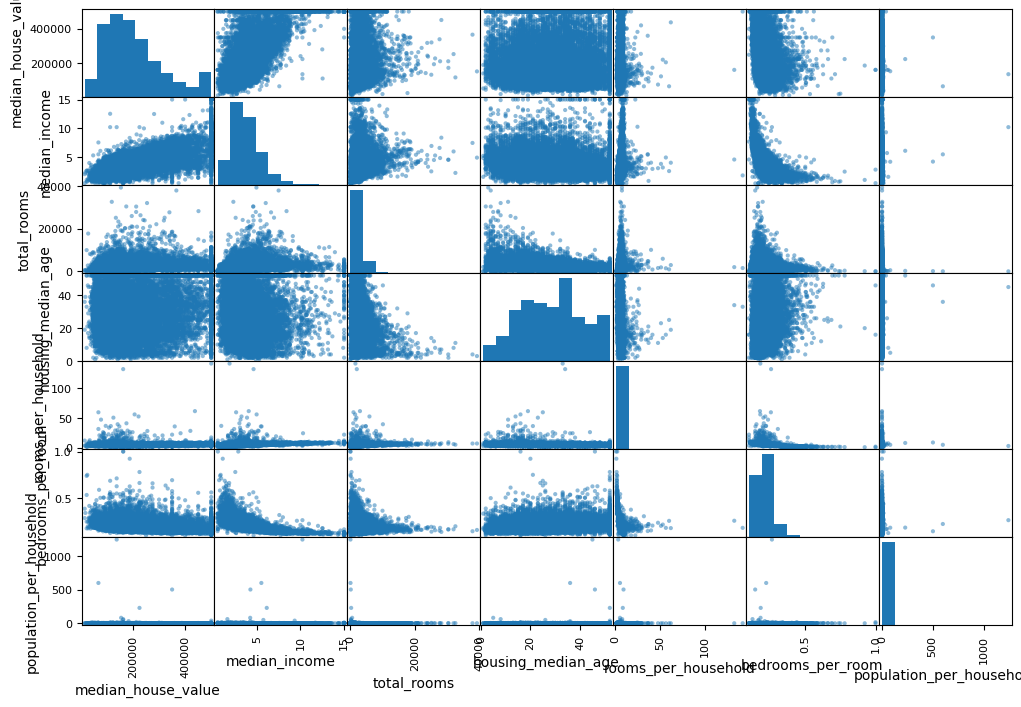

In [50]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['median_house_value','median_income','total_rooms', 'housing_median_age', 'rooms_per_household','bedrooms_per_room', 'population_per_household']], figsize=(12,8))

In [51]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689197
rooms_per_household         0.158133
total_rooms                 0.134464
housing_median_age          0.103892
households                  0.064613
total_bedrooms              0.049333
population_per_household   -0.021601
population                 -0.022586
longitude                  -0.049896
latitude                   -0.141071
bedrooms_per_room          -0.260608
Name: median_house_value, dtype: float64